# PageRank

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.linalg

Let $G = (V,E)$ be a directed graph on the vertices $1,2,\dotsm,n$. We add self-loops to every vertex that doesn't have an outgoing edge so that
$$
\delta^+(v) = \#\{u\in V: (v,u) \in E\}\ge 1.
$$

Recall that the adjacency matrix 
$$
A = (a_{ij})_{i,j\in[n]} \qquad a_{ij} = \begin{cases}
1&: (i,j)\in E\\
0&:\text{else}
\end{cases},
$$
and the matrix $D$ is
$$
D = \text{diag}(A\boldsymbol{1}) = \begin{bmatrix}
\delta^+(1)&0&\dotsm&0\\
0&\delta^+(2) &\dotsm&0\\
\vdots&&\ddots&\vdots\\
0&\dotsm&0&\delta^+(n)
\end{bmatrix}.
$$
Note that $D$ is invertible as all the diagonal entries $\delta^+(j)\ge 1$ are never zero.

Then the matrix
$$
P = D^{-1} A
$$
is the transition matrix of a random walk on the graph $G$.

PageRank will be a vector $\mathbf{PR} = (\mathbf{PR}_1,\dotsm,\mathbf{PR}_n)$ which measures in some sense the "centrality" of the webpage $j\in[n]$. 

A first guess may be that a good choice is a stationary distribution $\boldsymbol{\pi}$ of $P$:
$$
\pi_i = \sum_{j=1}^n \pi_j p_{ji} = \sum_{j: (j,i)\in E} \pi_j \frac{1}{\delta^+(j)}.
$$
Unfortunately, there could be infinitely many such vectors as we do not know whether or not $P$ is irreducible or not.

One way to overcome this is to **force** somehow the transition matrix $P$ to become irreducible. 

We know that if $P$ and $P'$ are two stochastic matrices that 
$$
\alpha P + (1-\alpha)P'\qquad \alpha\in[0,1]
$$ is stochastic (HW problem) and so may we can average $P$ with a *nice* matrix $P'$ to make a new matrix, $Q$, that is irreducible.

That is we define
$$
Q = \alpha P + (1-\alpha) \frac{1}{n} \boldsymbol{1}\boldsymbol{1}^T.
$$

Note $$
 \boldsymbol{1}\boldsymbol{1}^T = \begin{bmatrix}
 1&1&1&\dotsm&1\\
 1&1&1&\dotsm&1\\
 \vdots&&\ddots&&\vdots\\
 1&1&\dotsm&1&1
 \end{bmatrix}
$$
which has row sums of $n$. So $\frac{1}{n} \boldsymbol{1}\boldsymbol{1}^T$ is stochastic!

If $\alpha\in(0,1)$ then $Q_{i,j}\ge \frac{1-\alpha}{n}>0$ no matter what $P$ was, and so 
$$
Q\qquad\text{is weakly lazy and irreducible}.
$$
Hence it is also aperiodic.

Finally $\mathbf{PR}$ is defined as the unique stationary distribution of $Q$.

Let's look at some examples.

### Example 1

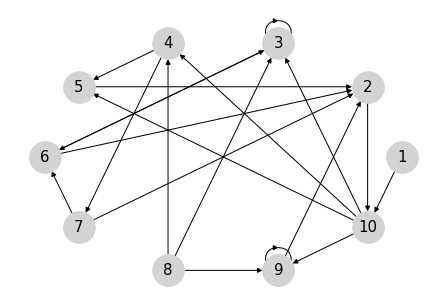

In [2]:
import random
random.seed(1149)
G = nx.DiGraph()
n = 10
G.add_nodes_from([1+j for j in range(n)])
nodes = [k for k in G.nodes()]
p = 1/6
for j in range(n):
    for i in range(n):
        if np.random.binomial(1,p) == 1:
            G.add_edge(i+1,j+1)
pos = nx.circular_layout(G)
nx.draw(G, node_size = 1000, pos = pos, node_color = 'lightgrey', with_labels = True, labels = {nodes[j]:j+1 for j in range(len(nodes))},font_size = 15)




As we can see several vertices share no outgoing neighbors.

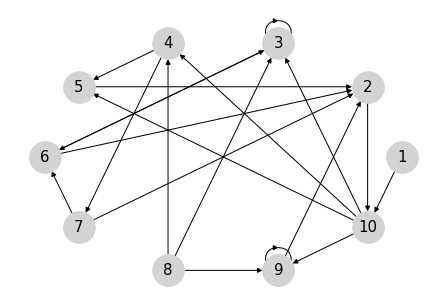

In [3]:
for v in G.nodes():
    if G.out_degree(v)==0:
        G.add_edge(v,v)
nx.draw(G, node_size = 1000, pos = pos, node_color = 'lightgrey', with_labels = True, labels = {nodes[j]:j+1 for j in range(len(nodes))},font_size = 15)


What are the relevant matrices?

In [5]:
A = nx.to_numpy_array(G)
print("A=")
print(A)
print("\n")

D = np.diag(np.matmul(A,np.ones(n)))
print("D=")
print(D)

P = np.matmul(np.linalg.inv(D),A)
print("\nP=")
print(np.round(P,2))

alpha = .85
print("\nalpha = 0.85\n")

Q = alpha*P+(1-alpha)*np.ones((n,n))/n
print("Q=")
print(np.round(Q,2))

(evals,evecsL) = scipy.linalg.eig(Q,left=True,right=False)

PageRank = np.real(evecsL[:,np.argmax(np.real(evals))])
PageRank = PageRank/np.sum(PageRank)

print("\nPageRank=")
print(np.round(PageRank,3))


A=
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 1. 0.]]


D=
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]

P=
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.5  0.   0.   0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.5  0.   0.5  0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.5  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0

Text(0, 0.5, 'PageRank Score')

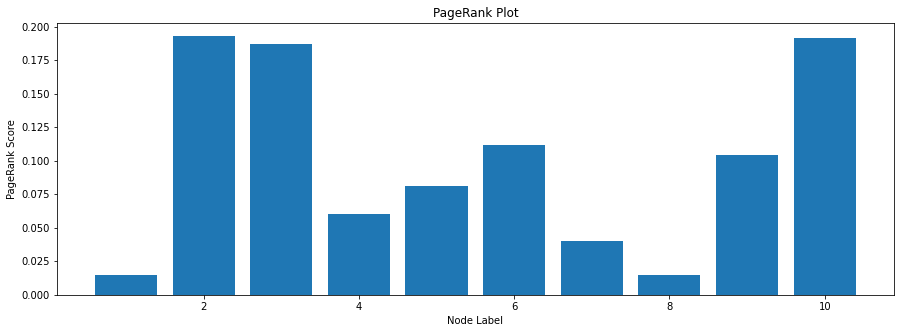

In [6]:
plt.figure(figsize = (15,5))
plt.bar([j+1 for j in range(n)], PageRank)
plt.title("PageRank Plot")
plt.xlabel("Node Label")
plt.ylabel("PageRank Score")

### Example 2
Let's look at a larger example. Here we have a random graph $G = ([100],E)$ where there are $n$ 100 nodes and each directed edges included independently with probabilities
$$
\mathbb{P}((i,j)\text{ is and edge}) = \begin{cases}
\frac{\log(100)}{100}\approx 0.046 &: j\neq 1\\
\frac{\log(100)}{10} \approx 0.46&: j= 1
 \end{cases}
$$
so that the vertex $1$ is a very central vertex. 

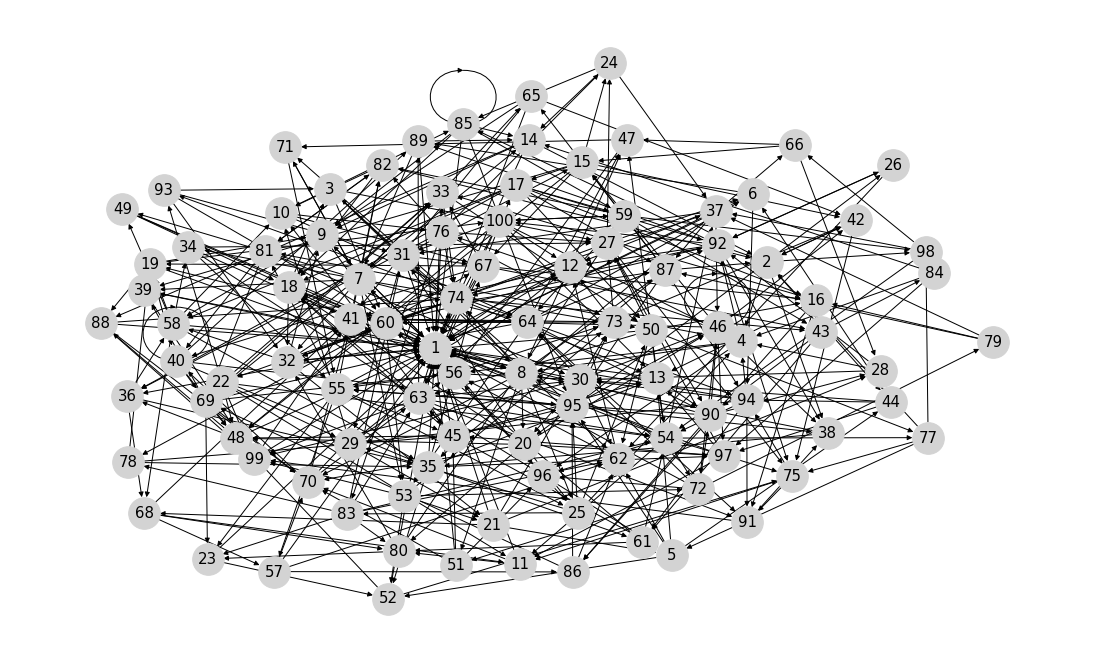

In [7]:
random.seed(1559)
G = nx.DiGraph()
n = 100
G.add_nodes_from([1+j for j in range(n)])
nodes = [k for k in G.nodes()]
p = np.log(n)/n
for j in range(n):
    if j ==0:
        q = 10*p
    else:
        q = p
    for i in range(n):
        if np.random.binomial(1,q)== 1:
            G.add_edge(i+1,j+1)
for v in G.nodes():
    if G.out_degree(v)==0:
        G.add_edge(v,v)
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize = (15,9))
nx.draw(G, node_size = 1000, pos = pos, node_color = 'lightgrey', with_labels = True, labels = {nodes[j]:j+1 for j in range(len(nodes))},font_size = 15)




In [104]:
A = nx.to_numpy_array(G)
print("A=")
print(A)
print("\n")

D = np.diag(np.matmul(A,np.ones(n)))
print("D=")
print(D)

P = np.matmul(np.linalg.inv(D),A)
print("\nP=")
print(np.round(P,3))

alpha = .85
print("\nalpha = 0.85\n")

Q = alpha*P+(1-alpha)*np.ones((n,n))/n
print("Q=")
print(np.round(Q,3))

(evals,evecsL) = scipy.linalg.eig(Q,left=True,right=False)

PageRank = np.real(evecsL[:,np.argmax(np.real(evals))])
PageRank = PageRank/np.sum(PageRank)

print("\nPageRank=")
print(np.round(PageRank,3))


A=
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


D=
[[ 4.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  5.  0.  0.]
 [ 0.  0.  0. ...  0.  4.  0.]
 [ 0.  0.  0. ...  0.  0.  5.]]

P=
[[0.25 0.   0.   ... 0.   0.   0.  ]
 [0.   0.1  0.   ... 0.   0.   0.  ]
 [0.25 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.25 0.25 0.   ... 0.   0.   0.  ]
 [0.2  0.   0.   ... 0.   0.   0.  ]]

alpha = 0.85

Q=
[[0.214 0.002 0.002 ... 0.002 0.002 0.002]
 [0.002 0.087 0.002 ... 0.002 0.002 0.002]
 [0.214 0.002 0.002 ... 0.002 0.002 0.002]
 ...
 [0.002 0.002 0.002 ... 0.002 0.002 0.002]
 [0.214 0.214 0.002 ... 0.002 0.002 0.002]
 [0.172 0.002 0.002 ... 0.002 0.002 0.002]]

PageRank=
[0.121 0.011 0.006 0.008 0.011 0.014 0.007 0.004 0.015 0.012 0.012 0.013
 0.011 0.012 0.033 0.003 0.011 0.009 0.008 0.0

Text(0, 0.5, 'PageRank Score')

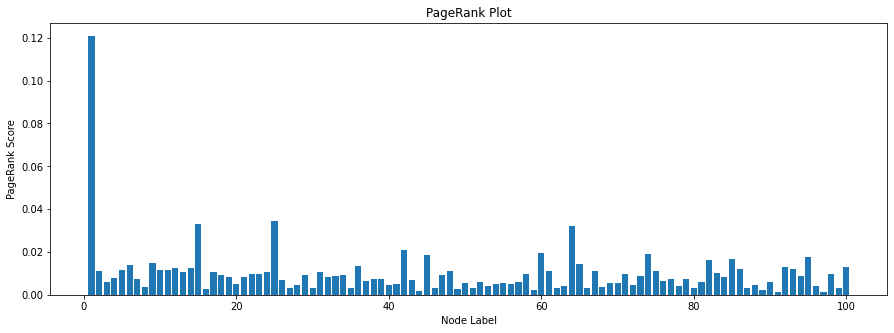

In [110]:
plt.figure(figsize = (15,5))
plt.bar([j+1 for j in range(n)], PageRank)
plt.title("PageRank Plot")
plt.xlabel("Node Label")
plt.ylabel("PageRank Score")

### Example 3

Consider another random graph $G = ([n],E)$ on $n = 15$ vertices, but this time each directed edges $(i,j)$ is included independently with probability
$$
\mathbb{P}((i,j)\text{ is an edge of }G) = \begin{cases}
\displaystyle \frac{1}{1+j^2} &: i<j\\
\displaystyle \frac{1}{1+\log(1+j)}&: i>j
\end{cases}
$$

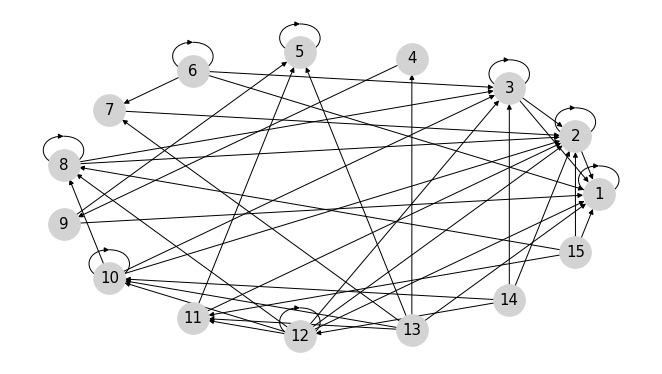

In [132]:
random.seed(59)
G = nx.DiGraph()
n = 15
G.add_nodes_from([1+j for j in range(n)])
nodes = [k for k in G.nodes()]
def edgeProbExample3(i,j):
    if i<j:
        p = 1/(1+j**2)
    else:
        p = 1/(1+np.log(1+j))
    return p
for j in range(n):
    for i in range(n):
        q = edgeProbExample3(i+1,j+1)
        if np.random.binomial(1,q)== 1:
            G.add_edge(i+1,j+1)
for v in G.nodes():
    if G.out_degree(v)==0:
        G.add_edge(v,v)
pos = nx.circular_layout(G)
plt.figure(figsize = (9,5))
nx.draw(G, node_size = 1000, pos = pos, node_color = 'lightgrey', with_labels = True, labels = {nodes[j]:j+1 for j in range(len(nodes))},font_size = 15)




In [130]:
digits =2
A = nx.to_numpy_array(G)
print("A=")
print(A)
print("\n")

D = np.diag(np.matmul(A,np.ones(n)))
print("D=")
print(D)

P = np.matmul(np.linalg.inv(D),A)
print("\nP=")
print(np.round(P,digits))

alpha = .85
print("\nalpha = 0.85\n")

Q = alpha*P+(1-alpha)*np.ones((n,n))/n
print("Q=")
print(np.round(Q,digits))

(evals,evecsL) = scipy.linalg.eig(Q,left=True,right=False)

PageRank = np.real(evecsL[:,np.argmax(np.real(evals))])
PageRank = PageRank/np.sum(PageRank)

print("\nPageRank=")
print(np.round(PageRank,digits+1))


A=
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


D=
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.

Text(0, 0.5, 'PageRank Score')

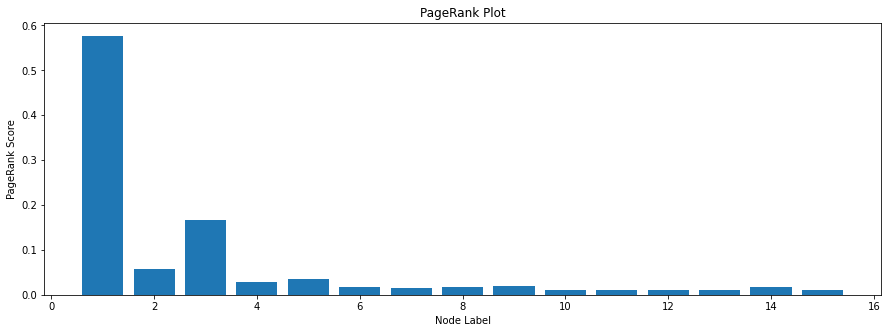

In [131]:
plt.figure(figsize = (15,5))
plt.bar([j+1 for j in range(n)], PageRank)
plt.title("PageRank Plot")
plt.xlabel("Node Label")
plt.ylabel("PageRank Score")